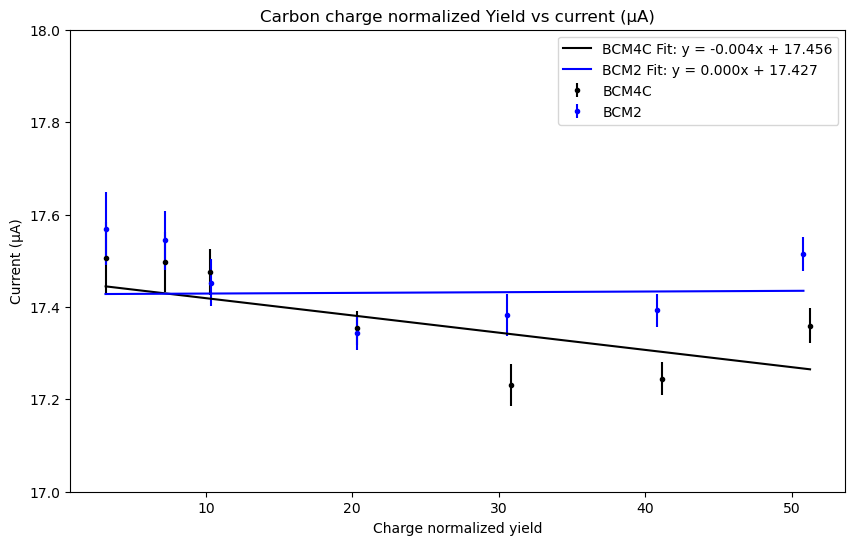

In [48]:
import uproot
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy 

run_num = [24301,
24303,
24304,
24306,
24307,
24308,
24309]

current = [51.24,
41.13,
30.82,
20.31,
10.31,
7.23,
3.16]

charge = [37827.35,
27226.99,
16826.45,
12357.99,
6850.76,
4243.65,
2838.22]

prescale = [3.00,
2.00,
2.00,
1.00,
1.00,
1.00,
1.00]

nentries = [218519,
234386,
144722,
214169,
119542,
74170,
49615]

eff = [0.9983,
0.9984,
0.9983,
0.9986,
0.9985,
0.9989,
0.9986]

bcm2Current = [50.789,
40.775,
30.550,
20.320,
10.326,
7.207,
3.151]

bcm2Charge = [37492.891,
26995.317,
16679.015,
12365.850,
6859.780,
4232.298,
2827.992]




norm = [None] * len(nentries)
norm_yield = [None] * len(nentries)
error = [None] * len(nentries)

bcm2Norm = [None] * len(nentries)
bcm2Yield = [None] * len(nentries)
bcm2Error = [None] * len(nentries)

for i in range(len(nentries)):
    norm[i] = prescale[i]/(charge[i] * eff[i])
    norm_yield[i] = nentries[i]*norm[i]
    error[i] = np.sqrt(nentries[i])*norm[i]

    bcm2Norm[i] = prescale[i]/(bcm2Charge[i] * eff[i])
    bcm2Yield[i] = nentries[i]*bcm2Norm[i]
    bcm2Error[i] = np.sqrt(nentries[i])*bcm2Norm[i]

    
def linear_model(x, a, b):
    return a * x + b

# Fit with error bars
popt, pcov = curve_fit(linear_model, current, norm_yield, sigma=error, absolute_sigma=True)
popt2, pcov2 = curve_fit(linear_model, bcm2Current, bcm2Yield, sigma=bcm2Error, absolute_sigma=True)

# Extract fit parameters and uncertainties
a_fit, b_fit = popt
a2_fit, b2_fit = popt2

a_err, b_err = np.sqrt(np.diag(pcov))
a2_err, b2_err = np.sqrt(np.diag(pcov2))

# Plot
x_fit = np.linspace(min(current), max(current), 500)
x2_fit = np.linspace(min(bcm2Current), max(bcm2Current), 500)

y_fit = linear_model(x_fit, *popt)
y2_fit = linear_model(x2_fit, *popt2)

plt.figure(figsize=(10, 6))

plt.errorbar(current, norm_yield, yerr= error, fmt='.',color = 'black', label = "BCM4C")

plt.errorbar(bcm2Current, bcm2Yield, yerr= bcm2Error, fmt='.',color = 'blue', label = "BCM2")

plt.plot(x_fit, y_fit, label=f'BCM4C Fit: y = {a_fit:.3f}x + {b_fit:.3f}', color = "black")

plt.plot(x2_fit, y2_fit, label=f'BCM2 Fit: y = {a2_fit:.3f}x + {b2_fit:.3f}', color = "blue")

plt.ylim(17,18)

plt.title("Carbon charge normalized Yield vs current (µA)")
plt.xlabel("Charge normalized yield")
plt.ylabel("Current (µA)")
# plt.yscale("log")
plt.legend()

- Try BCM2
- Try determining offsets in the current -> modified charges